In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse, rmse
from pmdarima import auto_arima
%matplotlib inline

In [2]:
RV_df=pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True) 
print(RV_df.shape,RV_df.columns)
RV_df.index.freq='D'
RV_df.head()

(517, 8) Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [3]:
RV_df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [4]:
RV_df_Train=RV_df.dropna()
print(RV_df_Train.shape)
RV_df_Train.tail()

(478, 8)


,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [5]:
col_ls=['rest1','rest2','rest3','rest4','total']
for col_ in col_ls:
    RV_df_Train[col_]=RV_df_Train[col_].astype(int)
RV_df_Train.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90
2017-04-21,Friday,0,na,38,53,36,38,165
2017-04-22,Saturday,0,na,97,20,50,59,226


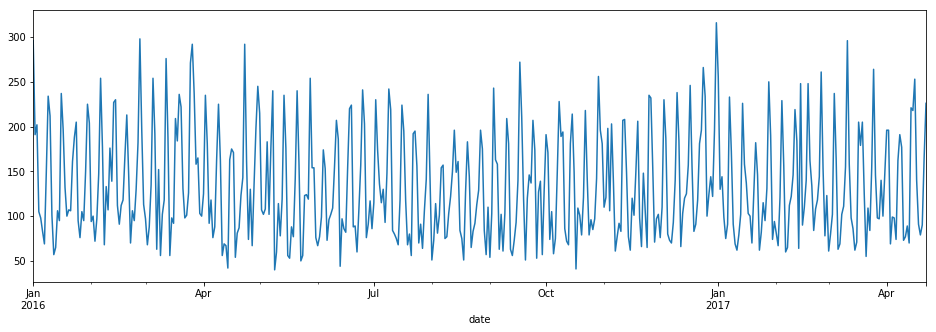

In [6]:
RV_df_Train['total'].plot(figsize=(16,5));

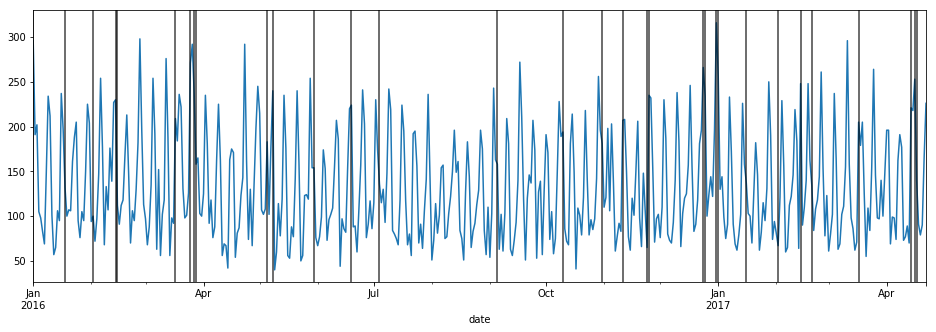

In [7]:
ax = RV_df_Train['total'].plot(figsize=(16,5))
for x_ in RV_df_Train[RV_df_Train['holiday']==1].index:
    ax.axvline(x=x_, color='black', alpha=0.75)

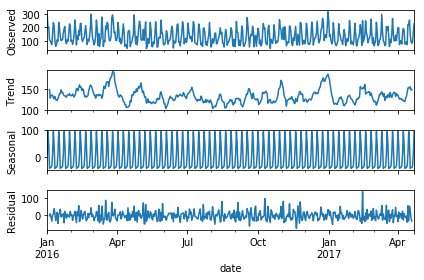

In [8]:
res_decompose = seasonal_decompose(RV_df_Train['total'])
res_decompose.plot();

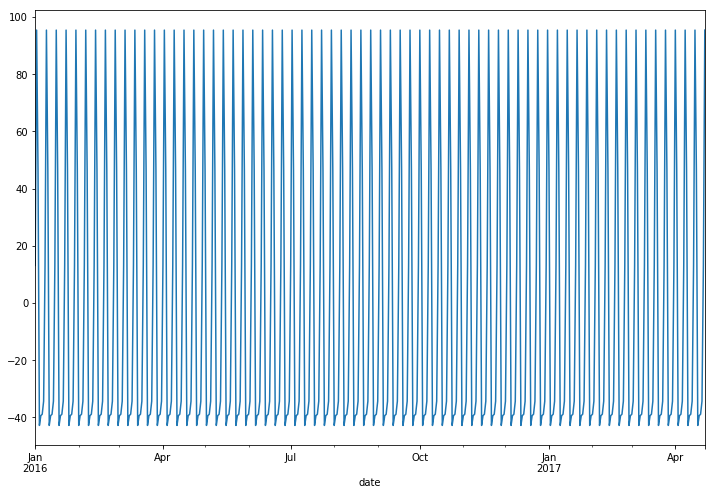

In [9]:
res_decompose.seasonal.plot(figsize=(12,8));

In [10]:
RV_df_Train.shape[0]

478

In [11]:
train=RV_df_Train.iloc[:436]
test=RV_df_Train.iloc[436:]
print(train.shape,test.shape)

(436, 8) (42, 8)


In [12]:
RV_model=auto_arima(train['total'], seasonal=True, m=7,
                    trace=True, error_action='ignore', suppress_warnings=True)
RV_model.summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4482.486, BIC=4515.108, Fit time=13.497 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=4809.926, BIC=4818.082, Fit time=0.043 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4487.895, BIC=4504.206, Fit time=2.963 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=4606.228, BIC=4622.539, Fit time=0.841 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 1, 7); AIC=4608.095, BIC=4636.638, Fit time=6.060 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 7); AIC=4522.339, BIC=4559.038, Fit time=19.574 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 0, 7); AIC=4478.881, BIC=4507.424, Fit time=10.757 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(1, 0, 0, 7); AIC=4481.605, BIC=4506.071, Fit time=10.336 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  436
Model:             SARIMAX(2, 0, 2)x(2, 0, 0, 7)   Log Likelihood               -2202.023
Date:                           Mon, 17 Jun 2019   AIC                           4420.046
Time:                                   16:10:20   BIC                           4452.667
Sample:                                        0   HQIC                          4432.920
                                           - 436                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     99.0518     16.563      5.980      0.000      66.589     131.515
ar.L1         -1.6379      0.032    -51.793      0.000      -1.700      -1.576
ar.L2         -0.7769      0.031    -25.387      0.000      -0.837      -0.717
ma.L1          1.8390      3.211      0.573      0.567      -4.455       8.133
ma.L2          1.0000      3.492      0.286      0.775      -5.844       7.844
ar.S.L7        0.4534      0.043     10.643      0.000       0.370       0.537
ar.S.L14       0.3346      0.039      8.576      0.000       0.258       0.411
sigma2      1279.1500   4471.992      0.286      0.775   -7485.793       1e+04
===================================================================================
Ljung-Box (Q):                       77.65   Jarque-Bera (JB):                24.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.47
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model = SARIMAX(train['total'], order=(2, 0, 2), seasonal_order=(2, 0, 0, 7),
                enforce_invertibility=False,enforce_stationarity=False)
result = model.fit()
result.summary()

/home/ubuntu/python3.6_virtual_env/CISCO_forecasting/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(2, 0, 2)x(2, 0, 0, 7)   Log Likelihood               -2122.050
Date:                           Mon, 17 Jun 2019   AIC                           4258.100
Time:                                   16:10:22   BIC                           4286.382
Sample:                               01-01-2016   HQIC                          4269.279
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4752      1.484      0.320      0.749      -2.433       3.384
ar.L2          0.1901      1.011      0.188      0.851      -1.792       2.172
ma.L1         -0.2717      1.480     -0.184      0.854      -3.172       2.629
ma.L2         -0.1716      0.719     -0.239      0.811      -1.581       1.238
ar.S.L7        0.4813      0.042     11.356      0.000       0.398       0.564
ar.S.L14       0.4695      0.042     11.076      0.000       0.386       0.553
sigma2      1439.2930     80.929     17.785      0.000    1280.675    1597.911
===================================================================================
Ljung-Box (Q):                       82.44   Jarque-Bera (JB):                32.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.46
Prob(H) (two-sided):                  0.84   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
start_=len(train)
end_=start_+len(test)-1
pred=result.predict(start=start_, end=end_, typ='levels').rename('SARIMA Ord (2, 0, 2) Seasonal Ord(2, 0, 0, 7)')

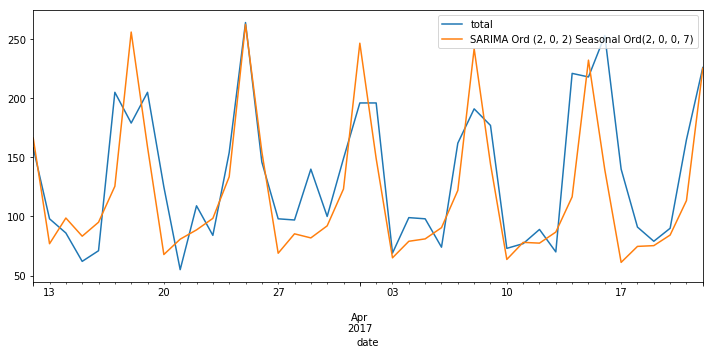

In [15]:
test['total'].plot(figsize=(12,5), legend=True)
pred.plot(legend=True);

In [16]:
error_rmse=rmse(test['total'],pred)
error_rmse

41.0969086912445

In [17]:
test['total'].mean()

134.26190476190476

In [18]:
pred.mean()

120.13169435846876

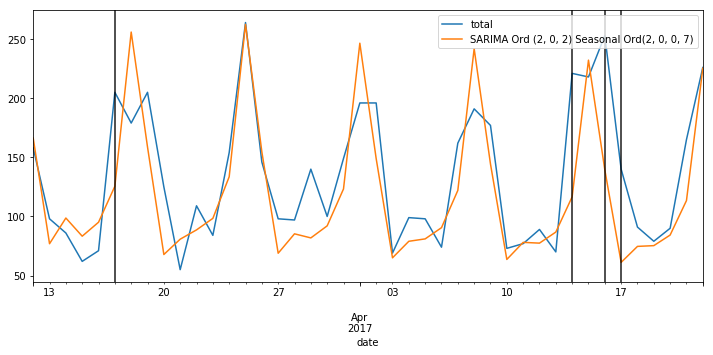

In [19]:
ax=test['total'].plot(figsize=(12,5), legend=True)
pred.plot(legend=True)
for x_ in RV_df_Train[RV_df_Train['holiday']==1].index:
    ax.axvline(x=x_, color='black', alpha=0.9);

In [20]:
RV_modelX=auto_arima(train['total'], exogenous=train[['holiday']],seasonal=True, m=7,
                    trace=True, error_action='ignore', suppress_warnings=True)
RV_modelX.summary()

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=4782.506, BIC=4794.738, Fit time=0.123 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4395.800, BIC=4416.189, Fit time=5.284 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=4536.899, BIC=4557.287, Fit time=2.579 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=4724.008, BIC=4740.319, Fit time=0.581 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4322.935, BIC=4347.401, Fit time=13.934 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4316.773, BIC=4337.162, Fit time=10.302 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 0, 0, 7); AIC=4312.671, BIC=4337.136, Fit time=9.620 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(2, 0, 0, 7); AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2150.335
Date:                           Mon, 17 Jun 2019   AIC                           4312.671
Time:                                   16:12:02   BIC                           4337.136
Sample:                                        0   HQIC                          4322.326
                                           - 436                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0452      4.051      1.739      0.082      -0.895      14.986
x1            73.6184      4.351     16.921      0.000      65.091      82.146
ma.L1          0.1497      0.053      2.824      0.005       0.046       0.254
ar.S.L7        0.5305      0.045     11.687      0.000       0.442       0.620
ar.S.L14       0.4077      0.043      9.496      0.000       0.324       0.492
sigma2      1113.9769     77.537     14.367      0.000     962.006    1265.948
===================================================================================
Ljung-Box (Q):                       93.28   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.00   Prob(JB):                         0.43
Heteroskedasticity (H):               0.95   Skew:                             0.11
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
modelX = SARIMAX(train['total'], exog=train[['holiday']], order=(0, 0, 1), seasonal_order=(2, 0, 0, 7),
                enforce_invertibility=False,enforce_stationarity=False)
resultX = modelX.fit()
resultX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2078.400
Date:                           Mon, 17 Jun 2019   AIC                           4166.801
Time:                                   16:12:04   BIC                           4187.026
Sample:                               01-01-2016   HQIC                          4174.793
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.0155      4.356     15.155      0.000      57.478      74.553
ma.L1          0.2027      0.051      3.951      0.000       0.102       0.303
ar.S.L7        0.5170      0.042     12.189      0.000       0.434       0.600
ar.S.L14       0.4564      0.041     11.067      0.000       0.376       0.537
sigma2      1110.1461     73.883     15.026      0.000     965.337    1254.955
===================================================================================
Ljung-Box (Q):                       93.83   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               0.94   Skew:                             0.16
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
start_=len(train)
end_=start_+len(test)-1
predX=resultX.predict(start=start_, end=end_, exog=test[['holiday']], typ='levels').rename('SARIMA (0,0,1) (2, 0, 0, 7)')

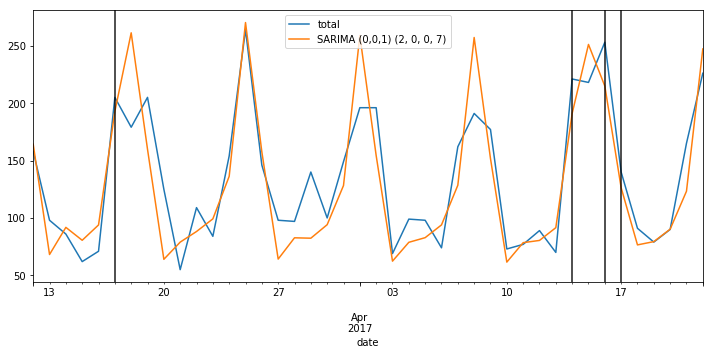

In [23]:
ax=test['total'].plot(figsize=(12,5), legend=True)
predX.plot(legend=True)
for x_ in RV_df_Train[RV_df_Train['holiday']==1].index:
    ax.axvline(x=x_, color='black', alpha=0.9);

In [24]:
test['total'].mean()

134.26190476190476

In [25]:
predX.mean()

129.49448609886946

In [26]:
error_rmse=rmse(test['total'],predX)
error_rmse

31.23232581557943

In [27]:
model_FB = SARIMAX(RV_df_Train['total'], exog=RV_df_Train[['holiday']], order=(0, 0, 1), seasonal_order=(2, 0, 0, 7),
                enforce_invertibility=False,enforce_stationarity=False)
result_FB = model_FB.fit()
result_FB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2279.255
Date:                           Mon, 17 Jun 2019   AIC                           4568.509
Time:                                   16:13:03   BIC                           4589.209
Sample:                               01-01-2016   HQIC                          4576.658
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.6707      4.227     15.774      0.000      58.387      74.955
ma.L1          0.1815      0.048      3.799      0.000       0.088       0.275
ar.S.L7        0.5050      0.039     12.897      0.000       0.428       0.582
ar.S.L14       0.4684      0.038     12.182      0.000       0.393       0.544
sigma2      1081.8353     67.695     15.981      0.000     949.155    1214.515
===================================================================================
Ljung-Box (Q):                       98.99   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               0.88   Skew:                             0.12
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
exog_fcast=RV_df[RV_df['total'].isnull()]

In [29]:
start_=len(RV_df_Train)
end_=start_+len(exog_fcast)-1
pred_fcast=result_FB.predict(start=start_, end=end_, exog=exog_fcast[['holiday']], typ='levels').rename('SARIMA (0,0,1) (2, 0, 0, 7)')

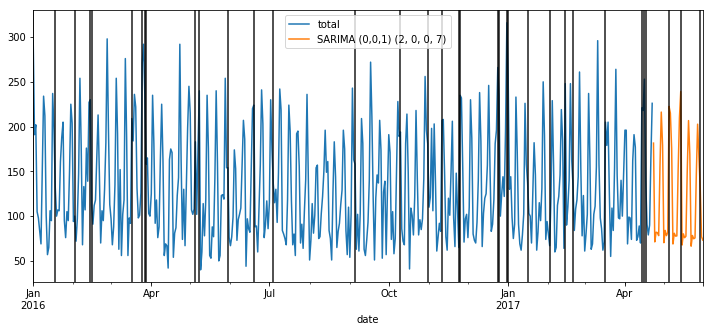

In [30]:
ax=RV_df_Train['total'].plot(figsize=(12,5), legend=True)
pred_fcast.plot(legend=True)
for x_ in RV_df[RV_df['holiday']==1].index:
    ax.axvline(x=x_, color='black', alpha=0.9);

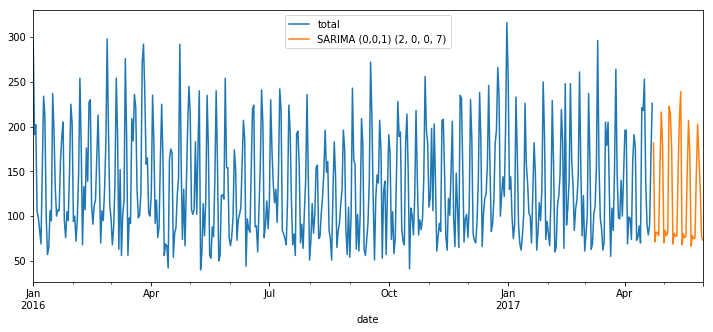

In [31]:
ax=RV_df_Train['total'].plot(figsize=(12,5), legend=True)
pred_fcast.plot(legend=True);

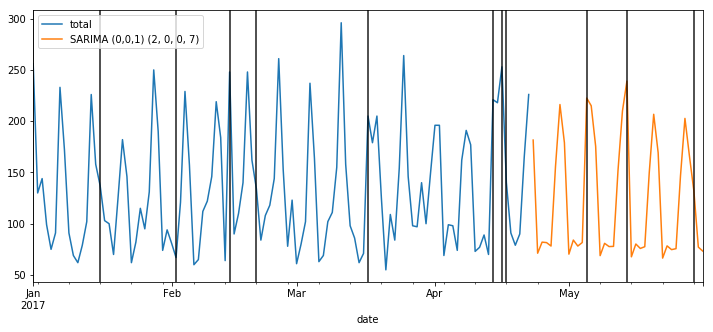

In [32]:
ax=RV_df_Train.loc['2017':]['total'].plot(figsize=(12,5), legend=True)
pred_fcast.plot(legend=True)
for x_ in RV_df[RV_df['holiday']==1].index:
    ax.axvline(x=x_, color='black', alpha=0.9);